# Project 6 - Statistics and Bootstrapping

## NAME   : RUCHIN PATEL
## USC ID : 9520665364
## EMAIL  : ruchinpa@usc.edu

## STATISTICS AND BOOTSTRAPPING
## PROBLEM STATEMENT

* Compute the sample mean, m , and the sample variance, $s^2$ of the empirical sample distribution.
* Use the data to generate a discrete approximation to the Cumulative Distribution Function – the empirical distribution, $F_{X^*}(x)$ Plot this distribution.
* By splitting the data into equal size intervals (0-5, 6-10, etc), generate a discrete approximation to the distribution and determine the values of the Probability Mass Function for this discrete approximation.
* Use the bootstrapping technique to generate M bootstrap sets of samples based on the empirical distribution found in part b), with each set containing n independent samples from the Empirical Distribution (repetition allowed). Compute the sample mean and sample variance for each of the Bootstrap sample sets, call these $m_{i}^*$ and $s_{i}^{*2}$ for i = 1,...,M respectively. Use M = 50 and M = 100.
* Estimate the MSE by: MSE($m^*$) = $\frac{1}{M} * \sum_{i=1}^{M} (m_{i}^* - m)^2$. We take this value to be an estimate of the MSE of the sample mean for the overall population distribution.
* Do a similar evaluation of the MSE of the bootstrap sample variance $s^{*2}$ as follows: MSE($s^{*2}$) = $\frac{1}{M} * \sum_{i=1}^{M} (s_{i}^{*2} - s^2)^2$.




##  THEORETICAL EXPLORATION
* $\textbf{CDF}$: The cdf is often denothed by $F_{X}(x)$ and is known as the Cumulative distribution function.

    * $F_{X}(x)$ = P(X <= x) where X is a random variable and the CDF is the probability of the random variable X being less than or equal to a particular value x.
     
* $\textbf{PMF}$: The pmf of a random variable X is denoted by P(X = x) where X is the random variable and PMF gives us the probability of a random variable X taking the value x.

* $\textbf{Sample Mean and Variance}$: The output from a simulation run in some observation of measured data X, which is actually just a random variable. We use this measure data to estimate some quantity of interest being studied, $\theta$. Usually E[X] = $\theta$. There is an underlying distribution for the X which may or may not be known. We call this underlying distribution the population distribution and denote the population mean by $\mu$ = E[X] and the population variance by $\sigma^2$ = E[$(X - \mu)^2$]. The population distribution can be found by running an infinite number of simulations or by having some analytical understanding of the physical system being simulated. We typically collect independent samples or runs which result in a set of observations {$X_i : i = 1,...n$} all of which are independently distributed random variables with mean $\theta$. We then find the average: $ \bar{X} = \frac{1}{n} * \sum_{i=1}^{n} (X_i)$ and use this as an estimator of $\theta$.
    
    *  $\textbf{Sample Mean}$: The sample mean is defined as follows: $\bar{X} = \frac{1}{n} * \sum_{i=1}^{n} (X_i)$
        
        * The mean squared error - the expected value of the squared difference between $\bar{X}$ and $\mu$ is just the variance of $\bar{X}$. i.e
            
            * MSE($\hat{m}$) = E[$(\bar{X} - \mu)^2$] = $\frac{\sigma^2}{n}$
    
    *  $\textbf{Sample Variance}$: The sample variance is is defined as follows: $S^2$ = $\frac{1}{n-1} * \sum_{i=1}^{n} (X_i - \bar{X})^2$.
        
        * Note that the the term (n-1) is in the denominator to make the sample variance an unbiased estimator.
        
* $\textbf{Interval Estimates}$: If the observed value of the sample mean is $\bar{X}$ = m and the sample standard deviation is $S^2$ = $s^2$, then we can use $(m - \frac{s}{\sqrt{n}}z_{\frac{\alpha}{2}},m + \frac{s}{\sqrt{n}}z_{\frac{\alpha}{2}})$ as the 100(1 - $\alpha$) confidence interval for $\mu$.

    * $z_{\frac{\alpha}{2}}$ is the value of RV Z which is distributed standard normally N(0,1) in sucha a way that: Pr{ $-z_{\frac{\alpha}{2}} < Z <  z_{\frac{\alpha}{2}}$ } = 1 - $\alpha$.
    
* $\textbf{Emperical Distributions}$: Given a set of samples {$X_i : i = 1,...n$} drawn from the distribution $F_X$.($X_i$ is the RV for the $i^th$ sample and $x_i$ is the actual value measured. We are interested in finding an estimate of some statistic $\theta$.
    
    * Almost every time however we do not know the distribution $F_X$ or even $\mu$ or $\sigma^2$ in that case we can find the emperical CDF as follows:
        
        * $F_{n}^{*}(x)$ = $\frac{1}{n} * \sum_{i=1}^{n} \delta(X_i <= x)$ where $\delta$ is an indicator function.
        * $\lim_{n\to\infty} F_{n}^{*}$ =  $F_{X}$. This means as the number of samples in the emperical distribution increases the emperical CDF tends to go towards the true CDF.
        
* $\textbf{Bootstrapping}$: The bootstrapping technique uses the emperical distribution to define the discrete sample space of distributin os each $X_i$. We generate a set of K bootstrap samples from the emperical distribution with replacement, calculate the sample mean and sample variance of each bootstrap sample and then use it to estimate the population mean.

In [335]:
samples = [37.12,2.78,1.33,33.55,45.39,9.25,28.32,35.62,28.00,4.56, \
           5.27,12.83,7.90,18.18,23.26,31.54,30.99,13.40,0.60,34.10, \
           8.45,3.98,33.25,31.10,28.67,12.55,30.92,27.88,31.44,2.28, \
           18.52,15.43,26.48,4.48,3.35,26.16,6.93,4.57,39.74,29.95, \
           28.96,32.79,19.91,1.86,7.12,27.49,32.62,20.71,33.32,11.33, \
           7.63,8.75,6.81,30.33,0.17,22.79,13.27,34.10,1.11,1.94, \
           0.27,0.14,30.43,30.57,35.38,33.72,24.10,36.62,5.01,0.24, \
           31.03,4.65,32.20,1.68,8.90,6.89,10.08,0.76,2.40,0.16, \
           36.22,24.87,25.84,5.34,1.92,2.3,33.56,24.03,1.3,8.53, \
           4.06,5.21,25.69,28.44,13.29,27.92,28.95,36.40,1.05,1.43 
          ]
samples = np.array(samples)
samples = np.sort(samples)

### a.)

In [336]:
m = np.mean(samples)
s_2 = np.var(samples)
st_dev = np.std(samples)
print('Sample mean m of the sample is: ',m)
print('Sample variance s_2 of the sample is: ',s_2)
print('Standard deviation of the sample is: ',st_dev)

Sample mean m of the sample is:  17.647100000000002
Sample variance s_2 of the sample is:  175.45997059
Standard deviation of the sample is:  13.246130400611342


| Sample Mean(m)|    Sample Variance($s^2$)    | 
|:---------------------:| :---------------------: | 
|    17.647                 | 175.46                   |   


* As we can see from the above values since the sample size is small the variance and hence the standard deviation are also high. If we could have gotten a bigger sample then the variance, standard deviation would have been less and the mean would have been more accurate.

### b.)

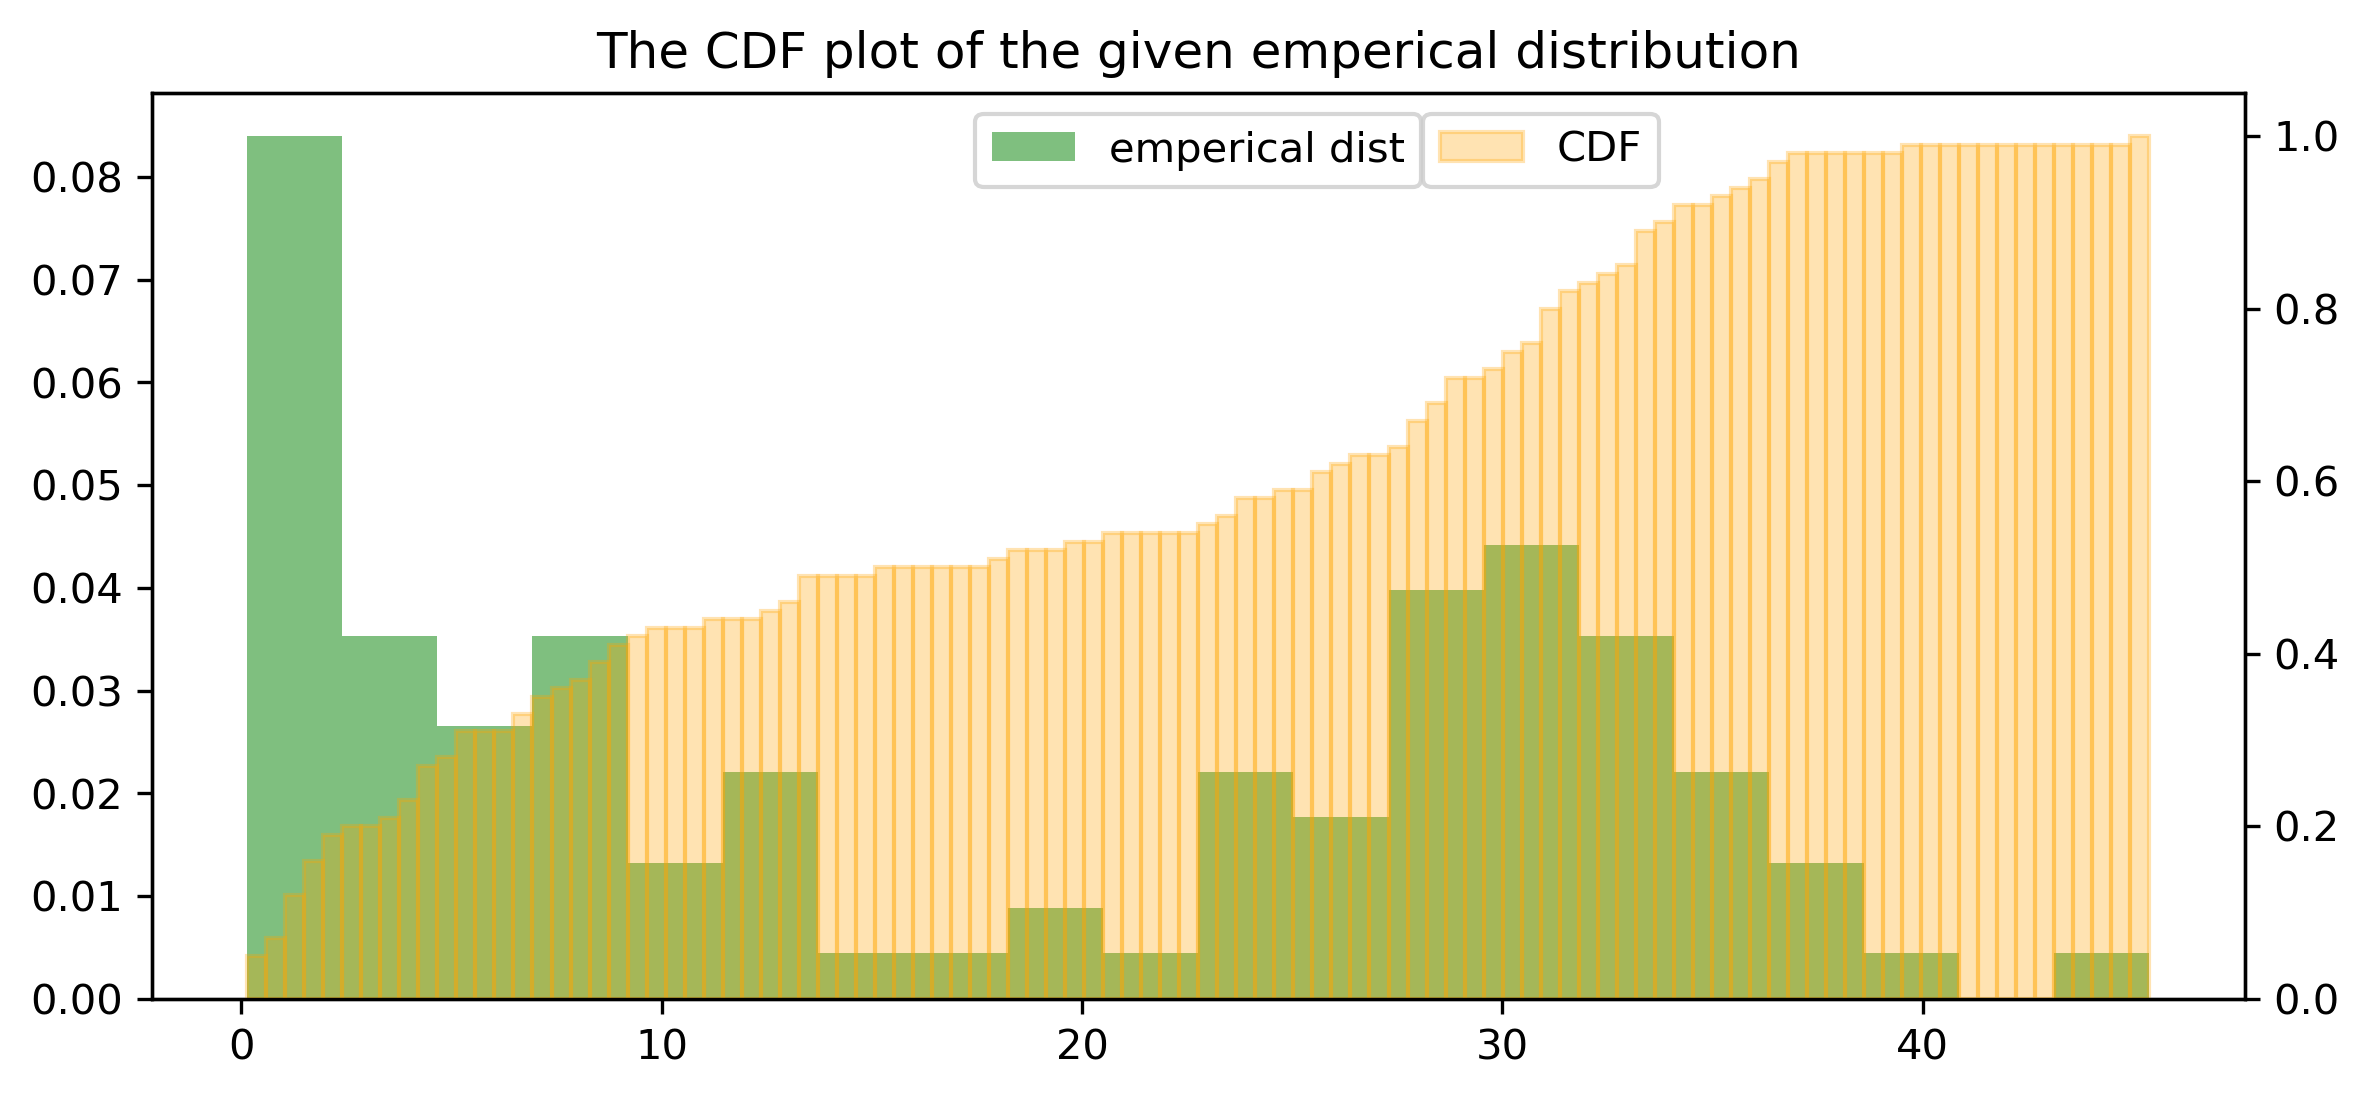

In [337]:
values = generate_CDF(samples)

* The above plot shows the distribution of the the emperical sample we have. Not only that but it also shows the corresponding CDF.

* The cdf from the above figure is the true CDF of the emperical distribution because of the following reasons:
    
    * The above CDF follows all the properties which a true CDF should follow:
    
        * 0 <= $F_{X}(x)$ <= 1. As we can see the maximum value of the CDF we have is 1 and the minimum is zero and hence this constraint is satisfied.
        
        * $\lim_{n\to\infty} F_{X} = 1$. This is infact true because as per the graph the CDF corresponding to the maximum value of the sample is 1.
        
        * $\lim_{n\to-\infty} F_{X} = 0$ and for positive values RV's $F_X(0) = 0$.  This property is also fulfilled by the CDF calculated above.
        
        * Also it is pretty evident that this CDF is non decreasing.
        
* Thus we can say that the CDF plotted above is the true distribution of our emperical sample.
        

### c.)

In [338]:
orig_cdf = values[0]
r = np.array(list(range(1,21)))
interval = r*5
interval = interval - 1

In [339]:
discrete_cdf = orig_cdf[interval]
discrete_intervals = values[1][interval]

r2 = np.array(list(range(0,20)))
interval2 = r2*5
discrete_intervals2 = values[1][interval2]

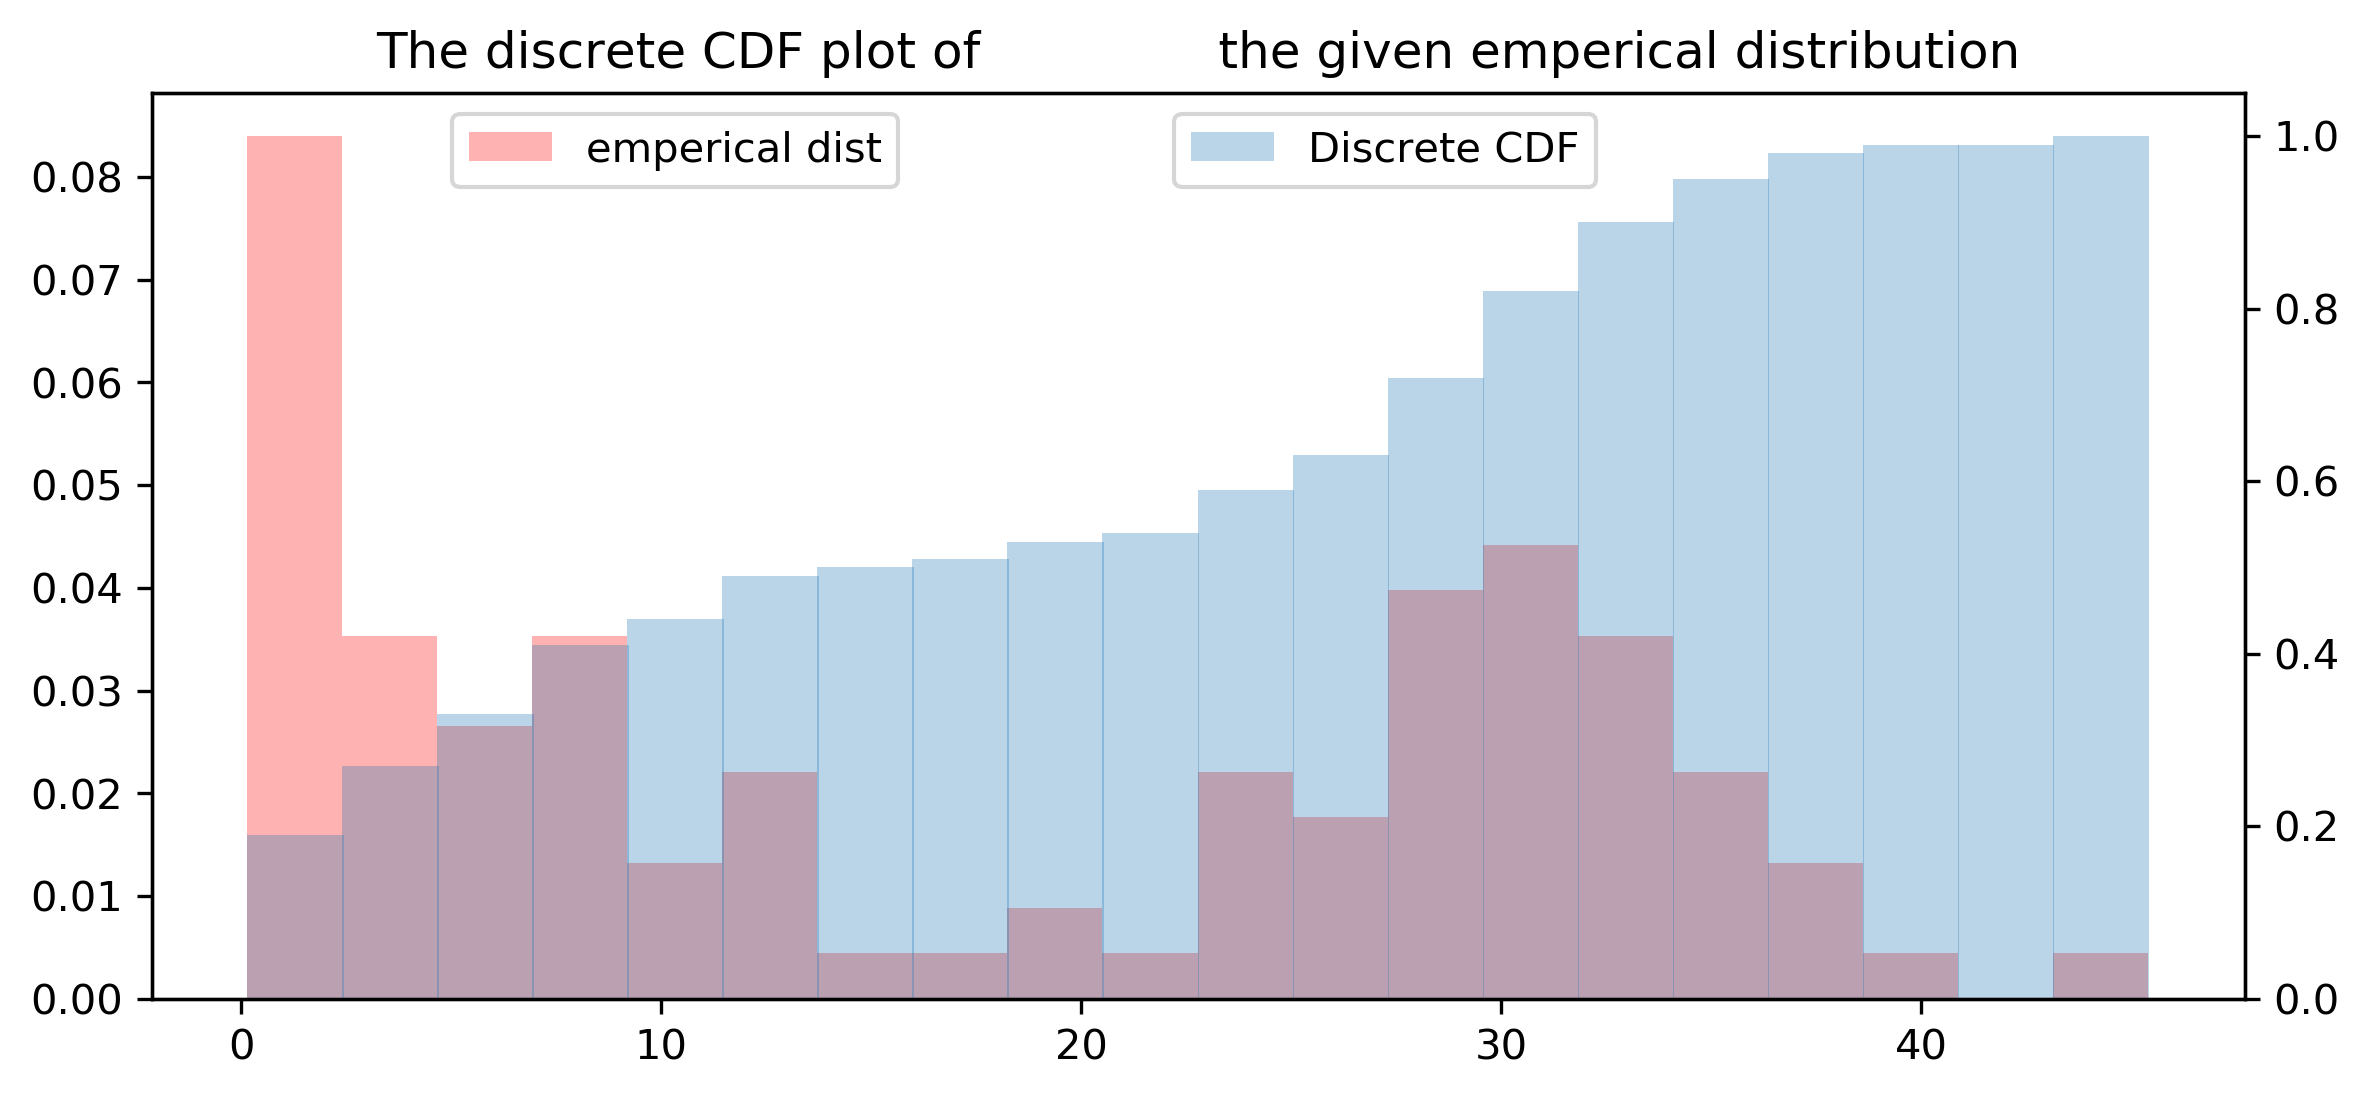

In [340]:
generate_discrete_CDF(samples,discrete_intervals2,discrete_cdf)

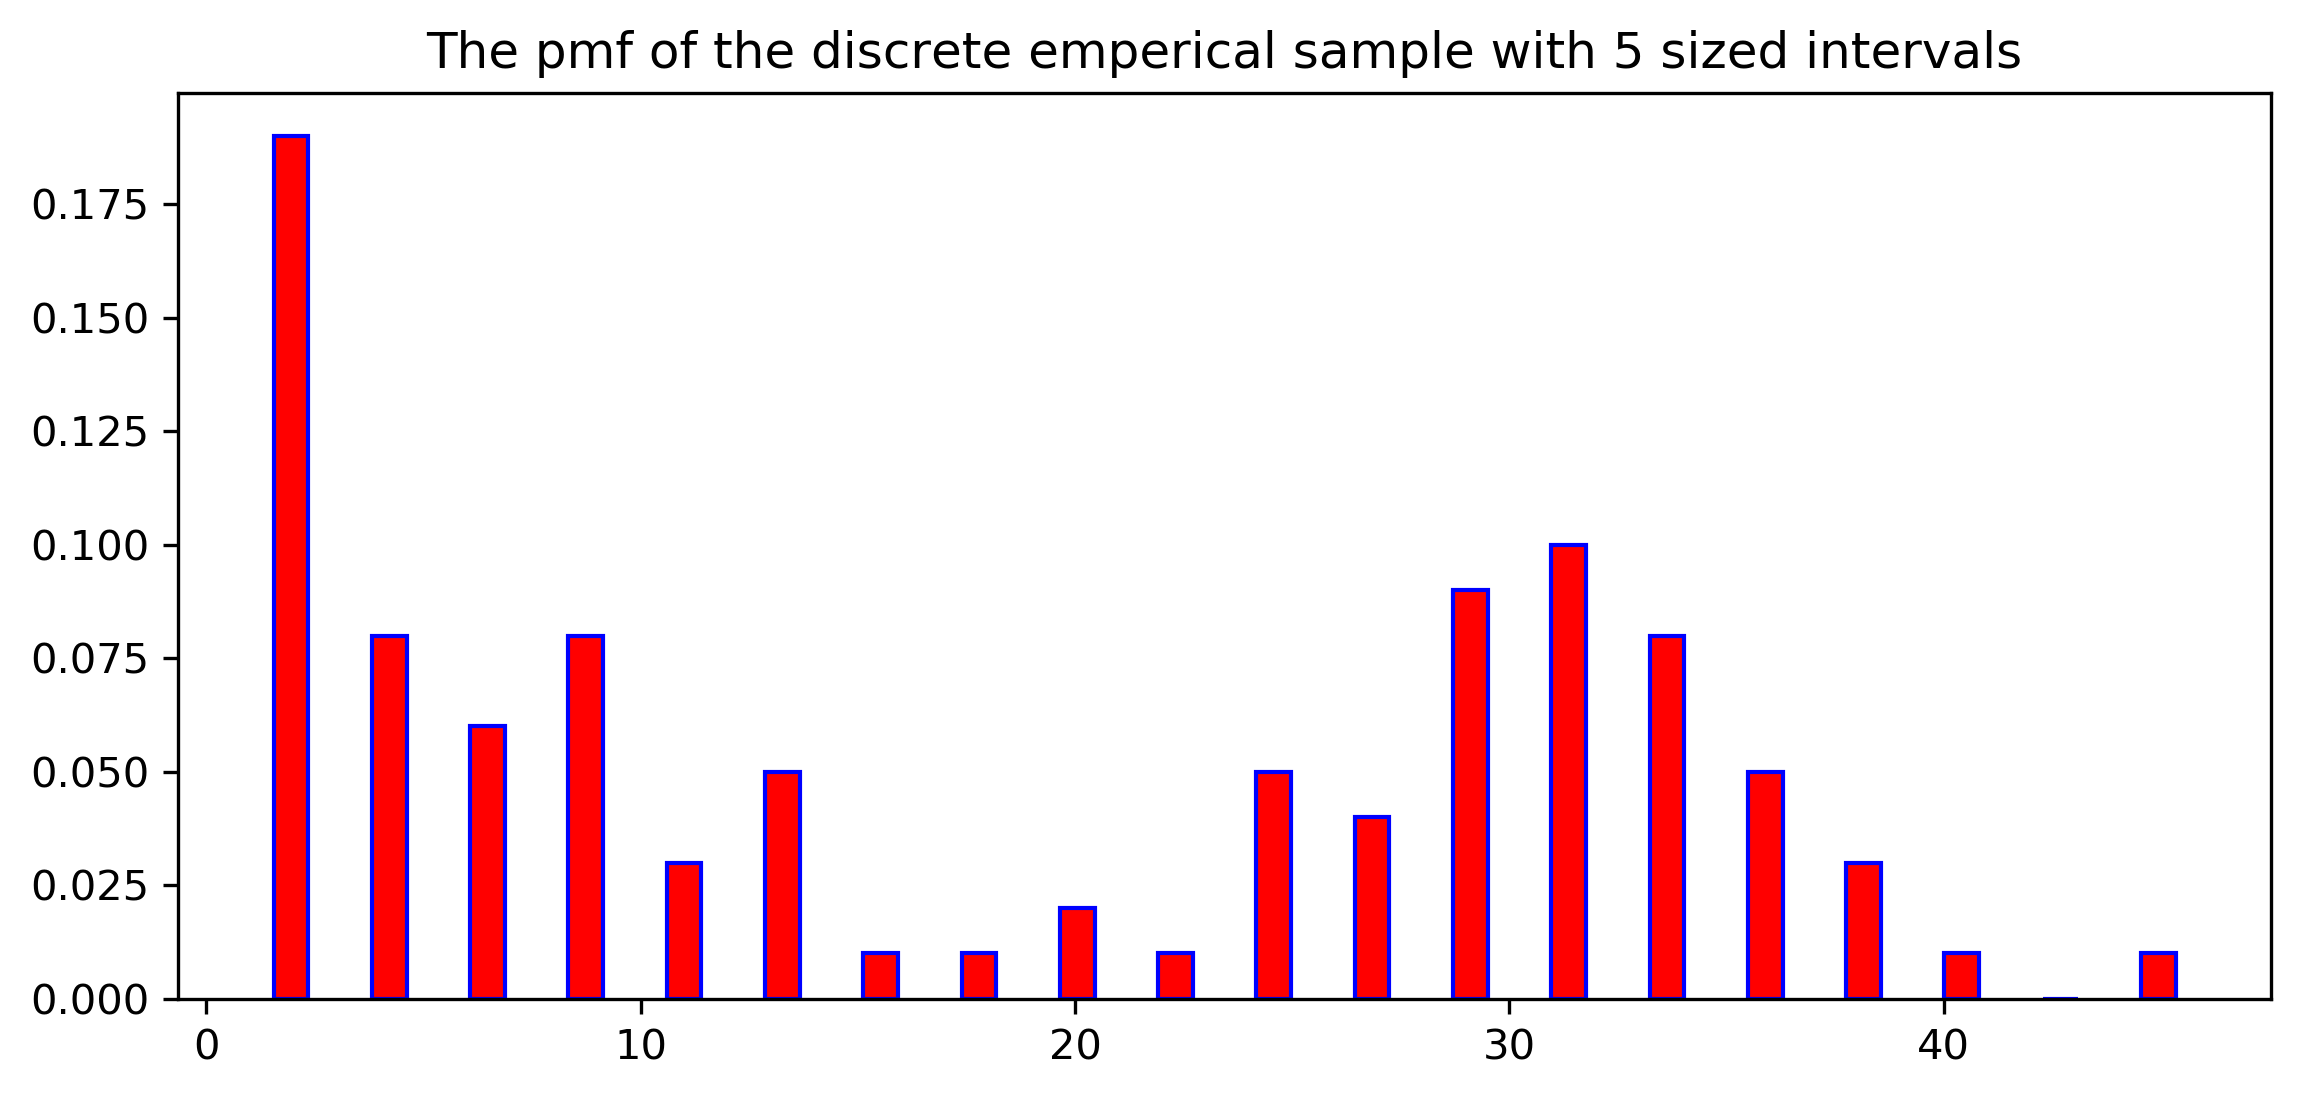

In [341]:
disc_pmf = calc_disc_pmf(discrete_cdf)
plt.figure(figsize=(9,4), dpi=300)
plt.bar(discrete_intervals,disc_pmf,color='red',edgecolor='blue')
plt.title('The pmf of the discrete emperical sample with 5 sized intervals')
plt.show()

* $\textbf{Methodology}$: The way in which I created this distribution is as follows:
    
    * Step-1 : Sorted the entire emperical sample so that it started from the lowest vale and ended at the highest value.
    * Step-2 : Then I divided the hundred samples in sizes of 5. So basically I considered the values corresponding to these indices from the sorted array.
        
        * Indices considered: [5,10,15,20,25,.....,100]
        
        * So the question arises that how do I calculate the CDF of the values occuring at these particular indices. This happens in the following way.
        
            * P(X <= $x_i$) = P(X <= $x_{i-1}$) + P(X <= $x_{i-2}$) + P(X <= $x_{i-3}$) + .... + P(X <= $x_{0}$)
            
|    x         | pmf               | CDF           |
|:------------:| :-----------:     |  :----------: |
|     1.95     |      0.19         |      0.19         |
|     4.2125   |      0.08         |      0.27         |
|     6.475    |      0.06         |      0.33         |
|     8.7375   |      0.08         |      0.41         |
|     11.0     |      0.03         |      0.44         |
|     13.2625  |      0.05         |      0.49         |
|     15.525   |      0.01         |      0.50         |
|     17.7875  |      0.01         |      0.51         |
|     20.05    |      0.02         |      0.53         |
|     22.3125  |      0.01         |      0.54         |
|     24.575   |      0.05         |      0.59         |
|     26.8375  |      0.04         |      0.63         |
|     29.1     |      0.09         |      0.72         |
|     31.3625  |      0.10         |      0.82         |
|     33.625   |      0.08         |      0.90         |
|     35.8875  |      0.05         |      0.95         |
|     38.15    |      0.03         |      0.98         |
|     40.4125  |      0.01         |      0.99         |
|     42.675   |      0.00         |      0.99         |
|     44.9375  |      0.01         |      1.00         |
|              | Total = 1         |                   |



* The above table gives us the discrete distribution of the sample. This PMF is correct because it sums to one and the CDF is correct because its final value is 1 and it is a non decreasing function.

* Also the graph of the pmf shows us that the PMF derieved from the CDF has the same shape as that of the original bimodal distribution of the entire emperical sample. This proves that our calculation are indeed correct.



            

In [342]:
print('To prove that this pmf is correct the sum should be one: ',np.round(np.sum(disc_pmf),decimals=0))

To prove that this pmf is correct the sum should be one:  1.0


### d.)

In [343]:
emp_dist = pd.DataFrame(samples)
bs_samps_50 = generate_bootstrap(emp_dist,50)
bs_param_50 = calc_mean_var(bs_samps_50)

bs_samps_100 = generate_bootstrap(emp_dist,100)
bs_param_100 = calc_mean_var(bs_samps_100)
print('The sample mean of 50 bootstrap samples are: ',bs_param_50[0])
print()
print()
print('The sample variance of 50 bootstrap samples are: ',bs_param_50[1])
print()
print()
print()
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print('The sample mean of 100 bootstrap samples are: ',bs_param_100[0])
print()
print()
print('The sample variance of 100 bootstrap samples are: ',bs_param_100[1])

The sample mean of 50 bootstrap samples are:  [17.671499999999995, 17.518700000000003, 18.421399999999995, 16.91199999999999, 15.840699999999996, 16.949700000000004, 16.90490000000001, 18.198300000000003, 16.426499999999997, 17.043700000000005, 19.459199999999996, 18.845000000000006, 17.3512, 19.90519999999999, 17.832999999999995, 16.957200000000004, 16.838300000000004, 17.3079, 17.365699999999993, 17.426200000000005, 16.47679999999999, 18.680799999999987, 18.30119999999999, 16.0888, 16.3022, 15.472300000000002, 18.480699999999995, 17.0898, 18.249899999999997, 17.2479, 19.155800000000003, 16.691599999999998, 16.9805, 13.948799999999999, 17.2947, 20.019, 17.049699999999994, 15.677, 17.5763, 16.9049, 19.1307, 18.53, 16.363099999999992, 18.262599999999992, 15.755999999999997, 18.3369, 16.058499999999995, 18.208399999999997, 19.6067, 18.731400000000004]


The sample variance of 50 bootstrap samples are:  [176.76595875000004, 167.71920331, 169.92979404000002, 166.47478800000002, 151.3084485

### e.)

In [344]:
calc_MSE(m,bs_param_50[0],'sample mean')
calc_MSE(s_2,bs_param_50[1],'sample variance')

The Mean squared error for  sample mean  with  50  bootstrap samples is:  1.5411745538000003
The Mean squared error for  sample variance  with  50  bootstrap samples is:  82.38986747361052


### f.)

In [345]:
calc_MSE(m,bs_param_100[0],'sample mean')
calc_MSE(s_2,bs_param_100[1],'sample variance')

The Mean squared error for  sample mean  with  100  bootstrap samples is:  1.8798845175000003
The Mean squared error for  sample variance  with  100  bootstrap samples is:  164.7216368930458


|      bootstrap size(M)       |   MSE of sample mean        | MSE of sample variance         |
|:------------:| :-----------:     |  :----------: |
|     50       |       1.75         |     172.27         |
|     100      |      1.78         |      133.03         |

* $\textbf{Analysis of part (e.) and (f.)}$ : 

    * The MSE of sample mean is fairly same for M = 50 and M=100. This is because the sample mean is an unbiazed estimator of the population mean and hence sample mean gives us fairly good estimates of the population mean which in our case is the mean of the emperical distribution. Due to this reason MSE for sample means is very low.
    
    * However for sample variance when the bootstrap sample size is less the MSE is more and when M is high the MSE is reduces. The reason is that as the bootstrap samples increase the sample variances tend to fall closer to the emperical distribution variance and because of this MSE also decreases.


here


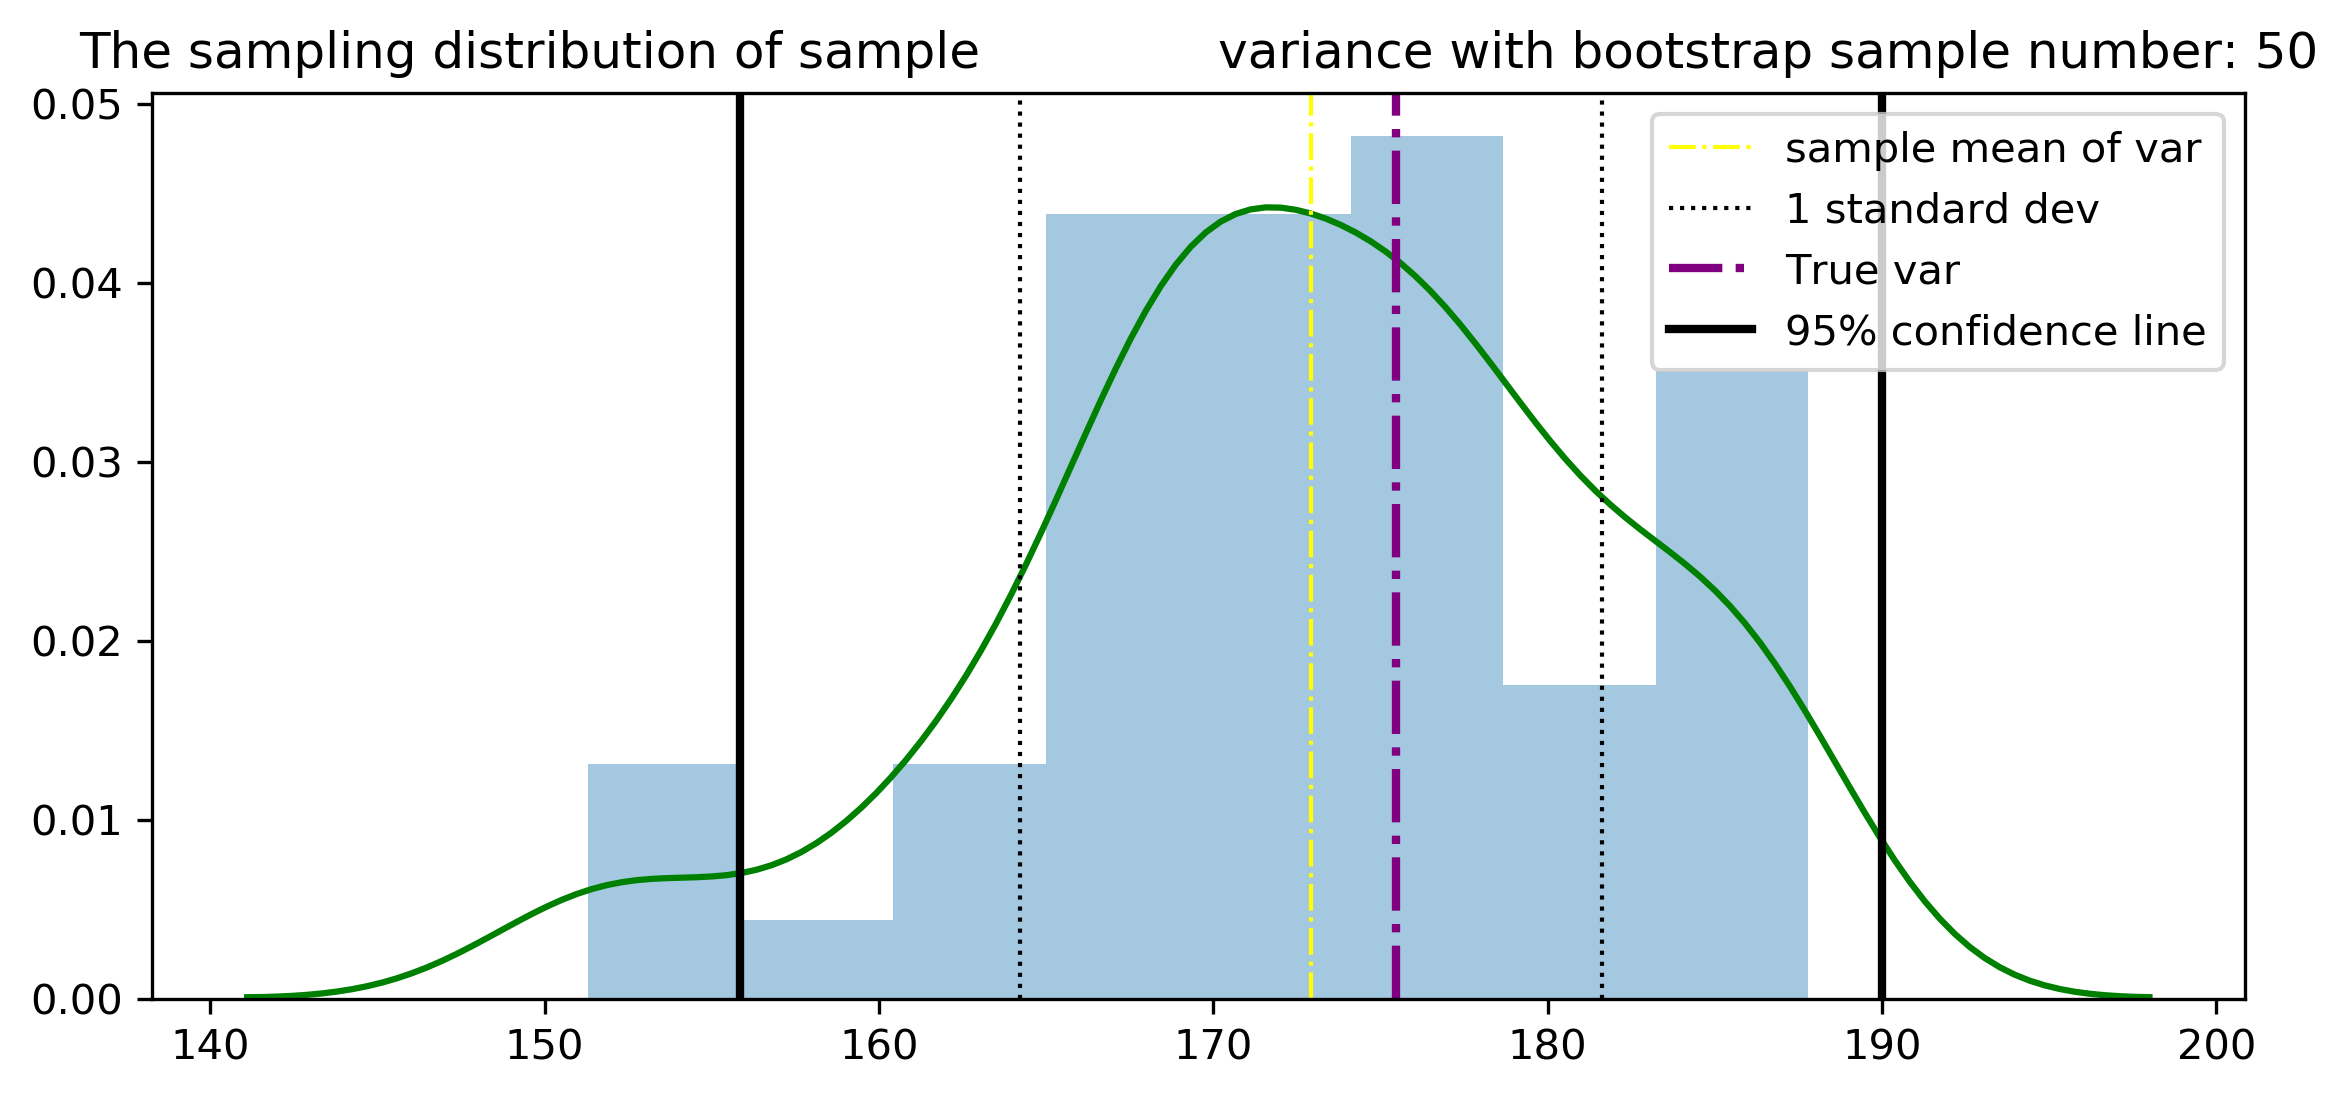

here


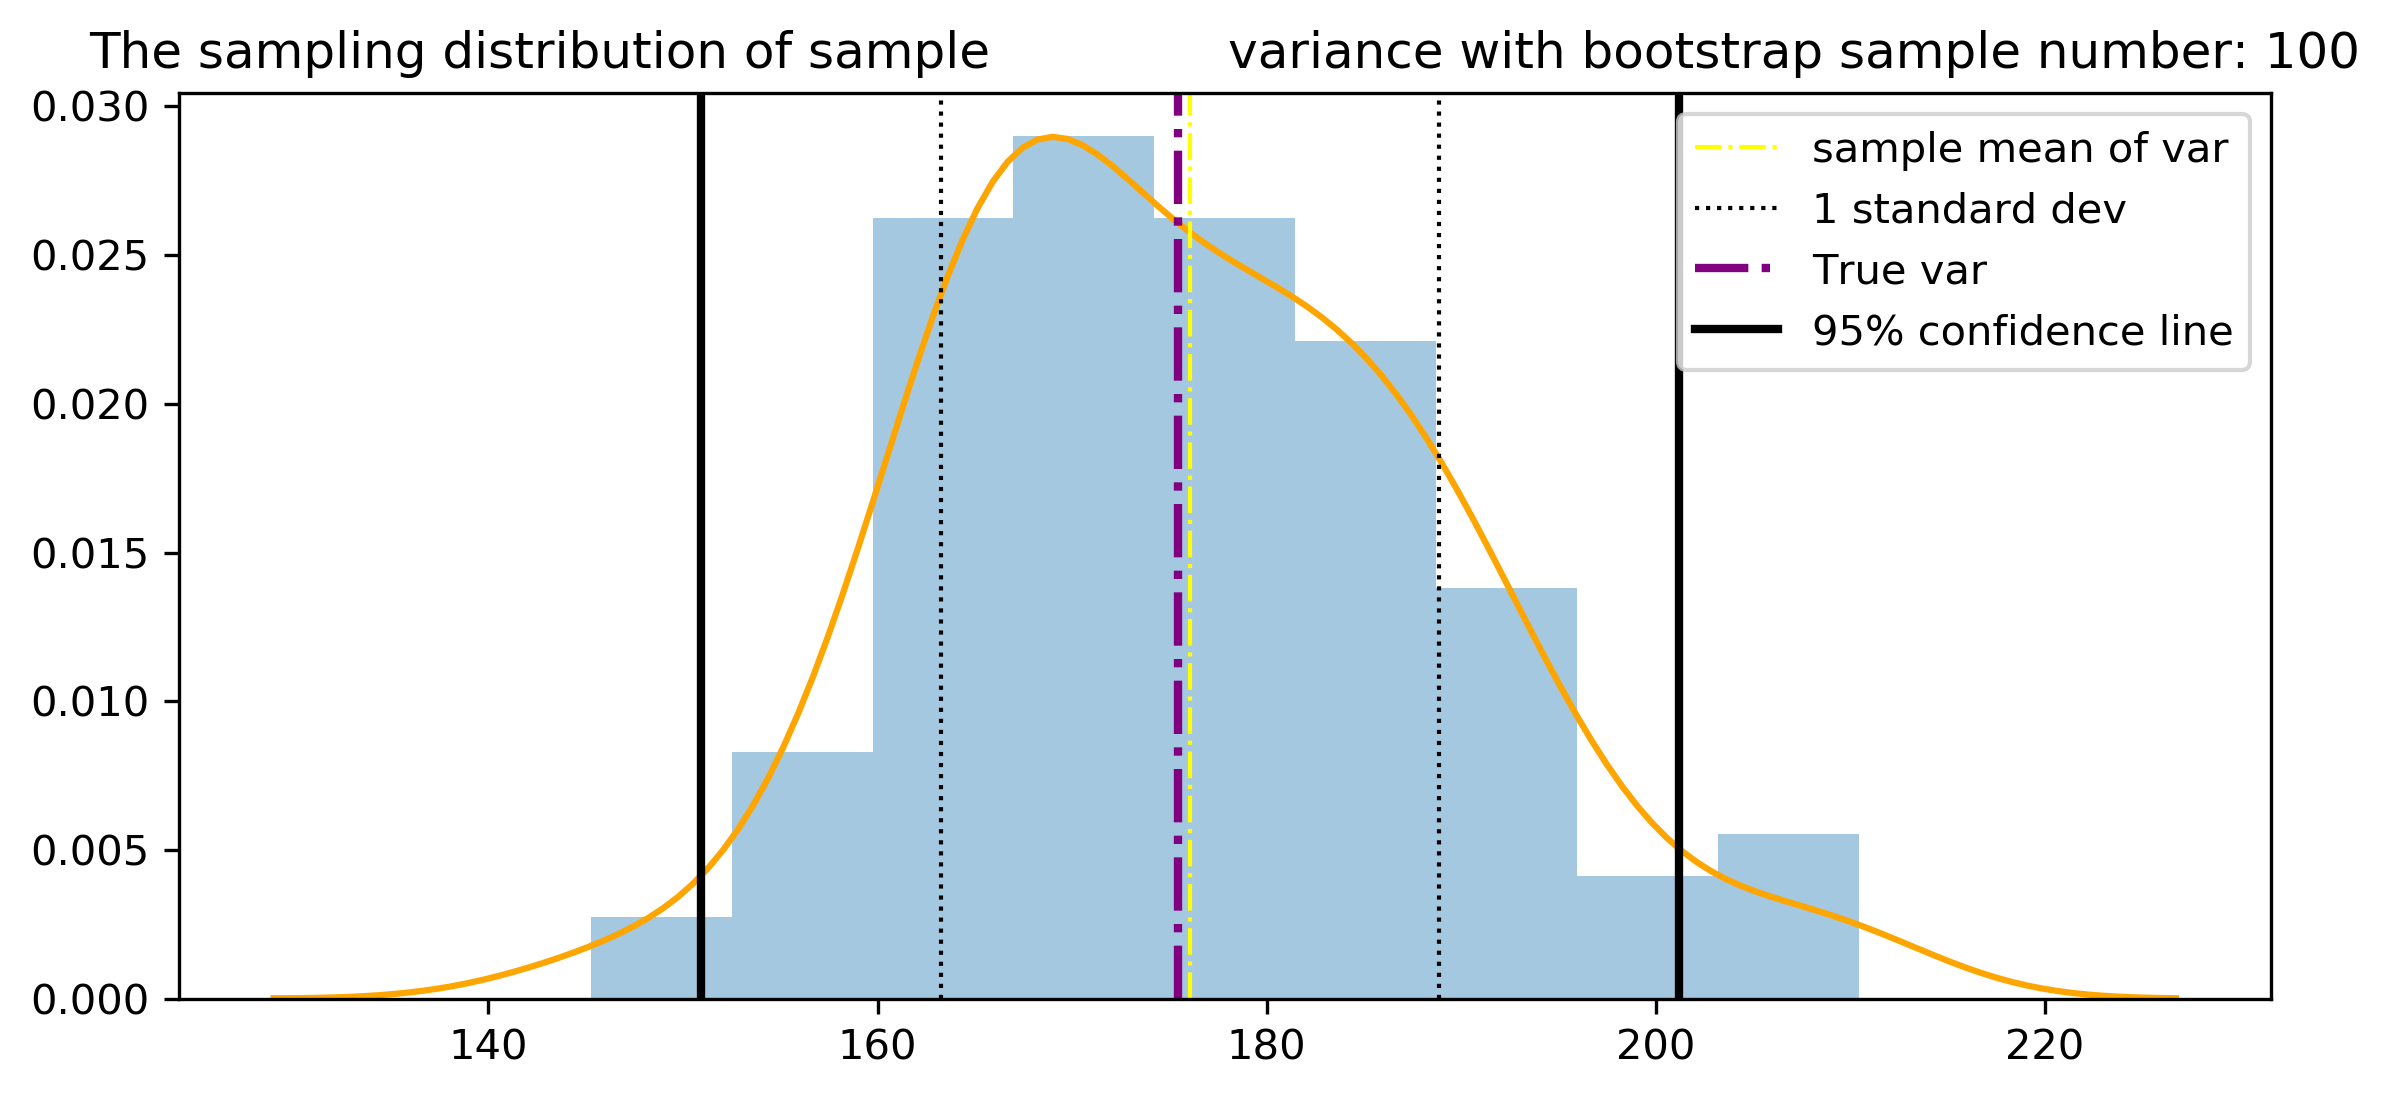

In [346]:
dist = bs_param_50[1]
P_hat = np.mean(dist)
std_sampling_dist = np.std(dist)
density_prop = {"color": "green"}
hist_prop = {"alpha": 0.3, "color": "red"}
plot_densityCurve(dist,density_prop,hist_prop,0,50,P_hat,std_sampling_dist,s_2)

dist = bs_param_100[1]
P_hat = np.mean(dist)
std_sampling_dist = np.std(dist)
density_prop = {"color": "orange"}
hist_prop = {"alpha": 0.3, "color": "red"}
plot_densityCurve(dist,density_prop,hist_prop,0,100,P_hat,std_sampling_dist,s_2)

* $\textbf{Conclusion}$
    * MSE of sample variance decreases as we increase the number of bootstrap samples. As we can see from the figures the distribution of the sample variance whem M=100 looks more normal and since the sample mean of the sample variance is quite near to the emperical variance line shown in purple the MSE in case of M = 100 would be very less.
    
    * Thus having more number of bootstrap samples would definitely reduce our MSE and give us good approximates about the true population parameters.
    

## FUNCTION DEFINITIONS

In [334]:
#########Function definitions#############
import numpy as np
import sklearn as sk
import scipy.stats as sci
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.mlab as mlab
import seaborn as sns
import warnings
import scipy.stats as st
import operator
from scipy.stats import binom
from scipy.stats import geom
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline
fontP = FontProperties()
fontP.set_size('small')
np.random.RandomState(seed=42)

def generate_CDF(samples):
    
    plt.figure(figsize=(9,4), dpi=300)
    plt.hist(samples,bins=20,normed=True,color='green', \
             alpha = 0.5,label = 'emperical dist')
    plt.legend(loc='upper center')
    plt.twinx()
    orig_cdf,bins,patches = plt.hist(samples,cumulative=True, \
                                     bins = 100,normed = True, \
                                       color='orange',alpha = 0.3, \
                                     edgecolor='orange',label='CDF')
    
    plt.title('The CDF plot of the given emperical distribution')
    plt.legend(loc='best', bbox_to_anchor=(0.23, 0.5, 0.5, 0.5))
    plt.show()
    
    return orig_cdf,bins,patches

def generate_discrete_CDF(samples,intervals,cdf):
    
    plt.figure(figsize=(9,4), dpi=300)
    plt.hist(samples,bins=20,normed=True,color='red', \
             alpha = 0.3,label = 'emperical dist')
    plt.legend(loc='upper center', \
               bbox_to_anchor=(0, 0.5, 0.5, 0.5))
    plt.twinx()
    plt.bar(intervals,cdf,align = 'edge', \
            width =2.3,alpha = 0.3, label = 'Discrete CDF')
    plt.title('The discrete CDF plot of \
              the given emperical distribution')
    plt.legend(loc='best', \
               bbox_to_anchor=(0.2, 0.5, 0.5, 0.5))
    plt.show()
    
def calc_disc_pmf(cdf):
    
    disc_pmf = []
    disc_pmf.append(cdf[0])
    for i in range(1,cdf.shape[0]):
        pmf = cdf[i] - np.sum(disc_pmf)
        disc_pmf.append(pmf)
        
    return disc_pmf

def generate_bootstrap(emp_dist,M):
    
    bootstrap_samples = []
    for i in range(0,M):
        bs = emp_dist.sample(n=100, replace=True)
        bootstrap_samples.append(bs)
        
    return bootstrap_samples

def calc_mean_var(bootstrap):
    m = []
    s_2 = []
    for i in range(0,len(bootstrap)):
         
        m.append(np.mean(bootstrap[i][0]))
        s_2.append(np.var(bootstrap[i][0]))
        
    return m,s_2

def calc_MSE(m,param,s1):
    M = len(param)
    total = 0 
    for i in range(0,M):
        sq_err = np.square(param[i] - m)
        total = total + sq_err
        
    MSE = total/M
    
    print('The Mean squared error for ',s1, \
          ' with ',M,' bootstrap samples is: ',MSE)
    
    
def plot_densityCurve(*args):
    
    plt.figure(figsize=(9,4), dpi=300)
    sns.distplot(args[0],kde_kws=args[1])
    print('here')
    plt.axvline(args[5], color='yellow', \
                linestyle='-.', linewidth=1,label='sample mean of var')
    plt.axvline(args[5]-args[6], \
                color='black', linestyle=':', linewidth=1, \
                label='1 standard dev')
    plt.axvline(args[5]+args[6], \
                color='black', linestyle=':', linewidth=1)
    plt.axvline(args[7], color='purple', \
                linestyle='-.', linewidth=2,label='True var')
    plt.axvline(args[5]-(1.96*args[6]), \
                color='black',linewidth=2, \
                label='95% confidence line')
    plt.axvline(args[5]+(1.96*args[6]), \
                color='black',linewidth=2)
    #plt.xlim(0.72,0.85)
    plt.legend()
    plt.title("The sampling distribution of sample \
              variance with bootstrap sample number: "+str(args[4]))
    plt.show()       
        
    